In [1]:
import os
import pickle as pkl
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append(os.path.join(os.getcwd(), '..', '..', '..'))
from settings import RESULTS_PATH

In [2]:
os.listdir(RESULTS_PATH)

['sigmoid_relu_experiment.pkl',
 'batch_size_experiment.pkl',
 'layer_size_experiment.pkl']

In [3]:
experiment_path = os.path.join(RESULTS_PATH, 'sigmoid_relu_experiment.pkl')

In [4]:
with open(experiment_path, 'rb') as file:
    results = pkl.load(file)

In [5]:
results = [item for sublist in results for item in sublist]

In [6]:
results = pd.DataFrame(results)

In [7]:
results.columns = ['train_loss', 'val_loss', 'test_loss', 'train_accuracy', 'val_accuracy',
                   'test_accuracy', 'repeat', 'activation', 'epoch']
results.head()

,train_loss,val_loss,test_loss,train_accuracy,val_accuracy,test_accuracy,repeat,activation,epoch
0,2.350927,2.351386,2.361180,0.07308,0.0705,0.0665,0,sigmoid,0
1,2.461278,2.463111,2.416784,0.05998,0.0558,0.0558,0,relu,0
2,1.831188,1.820905,2.365296,0.62356,0.6329,0.6305,0,sigmoid,1
3,0.654688,0.605180,4.347230,0.83140,0.8496,0.8391,0,relu,1
4,1.355925,1.332809,2.614763,0.73794,0.7579,0.7447,0,sigmoid,2


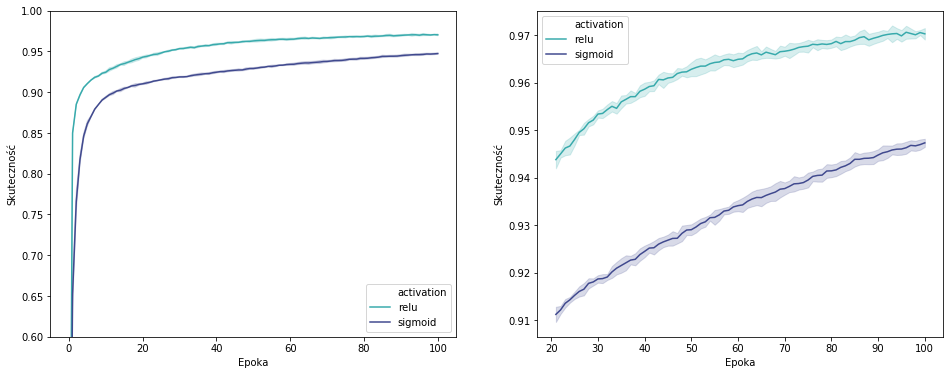

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
palette = sns.color_palette("mako_r", 2)
sns.lineplot(x='epoch', 
             y='val_accuracy', 
             hue='activation', 
             hue_order=sorted(results['activation'].unique()),
             data=results, 
             ax=ax[0],
             legend="full", palette=palette, ci='sd')

sns.lineplot(x='epoch', 
             y='val_accuracy', 
             hue='activation', 
             hue_order=sorted(results['activation'].unique()),
             data=results[results['epoch']>20], 
             ax=ax[1],
             legend="full", 
             palette=palette,
             ci='sd')
ax[0].set_ylabel('Skuteczność')
ax[0].set_xlabel('Epoka')
ax[1].set_ylabel('Skuteczność')
ax[1].set_xlabel('Epoka')
ax[0].set_ylim(0.6, 1.0)
plt.show()

## Store results